In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import random
# pio.templates.default = 'simple_white'
import datetime
import tqdm

### Decluttering

In [2]:
pio.templates.default

'plotly'

In [3]:
! cp ../analyst_agent/full_data.csv .

In [119]:
ts_df = pd.read_csv('full_data.csv', sep = '\t')
ts_df['month_date'] = ts_df['date'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m-01'))
ts_df = ts_df.pivot_table(index = 'month_date', columns = 'os', values = 'session_id', aggfunc = 'count').loc['2023-03-01':]

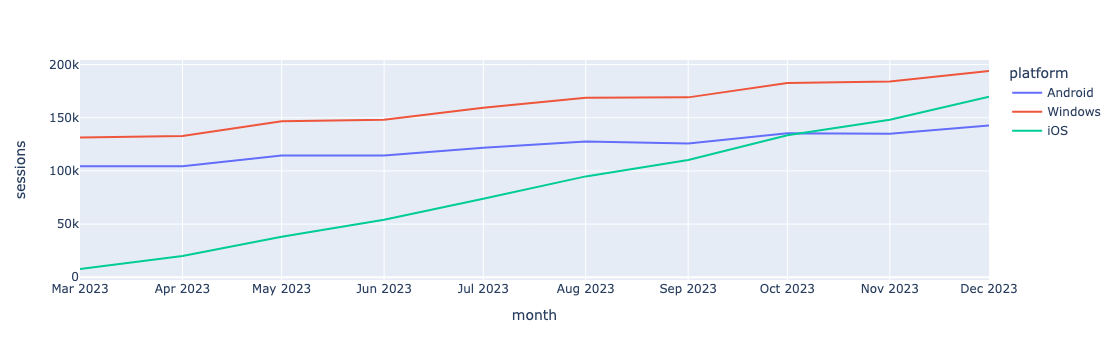

In [120]:
pio.templates.default = 'plotly' # default
px.line(ts_df, width = 600, labels = {'value': 'sessions', 'os': 'platform', 'month_date': 'month'})

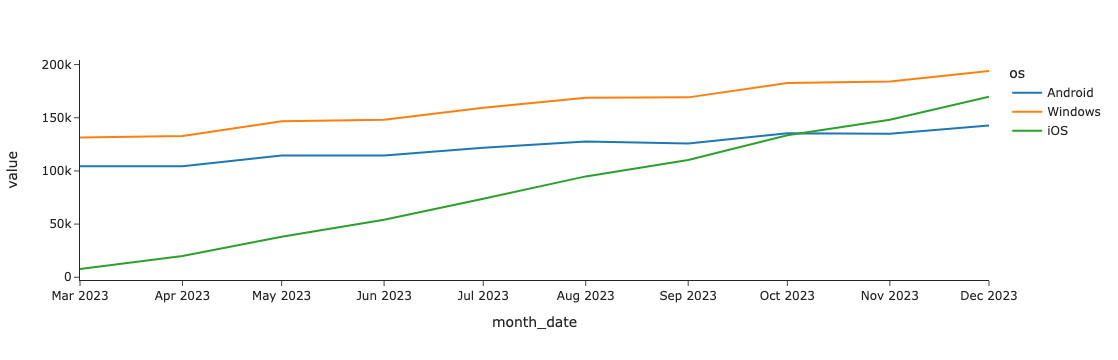

In [178]:
pio.templates.default = 'simple_white'
px.line(ts_df, width = 600)

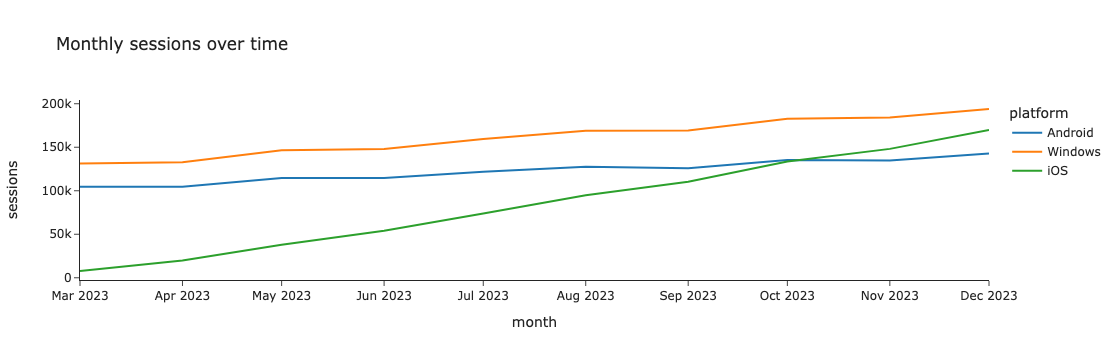

In [180]:
pio.templates.default = 'simple_white'
px.line(ts_df, width = 600, labels = {'value': 'sessions', 'os': 'platform', 'month_date': 'month'},
       title = 'Monthly sessions over time')

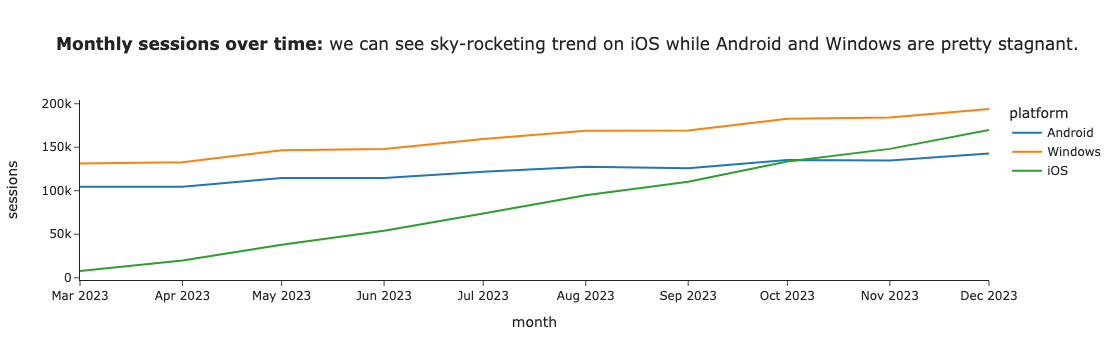

In [182]:
title = '<b>Monthly sessions over time:</b> we can see sky-rocketing trend on iOS while Android and Windows are pretty stagnant.'

px.line(ts_df, width = 600, labels = {'value': 'sessions', 'os': 'platform', 'month_date': 'month'},
       title = title)

In [183]:
def format_string_by_lines(s, line_limit = 70):    
    lines = []
    curr_line_words = []
    curr_line_length = 0
    
    
    for word in s.split(' '):
        if curr_line_length + len(word) > line_limit:
            lines.append(' '.join(curr_line_words))
            curr_line_words = []
            curr_line_length = 0
    
        curr_line_words.append(word)
        curr_line_length += len(word)
    
    lines.append(' '.join(curr_line_words))
    return ' <br> '.join(lines)

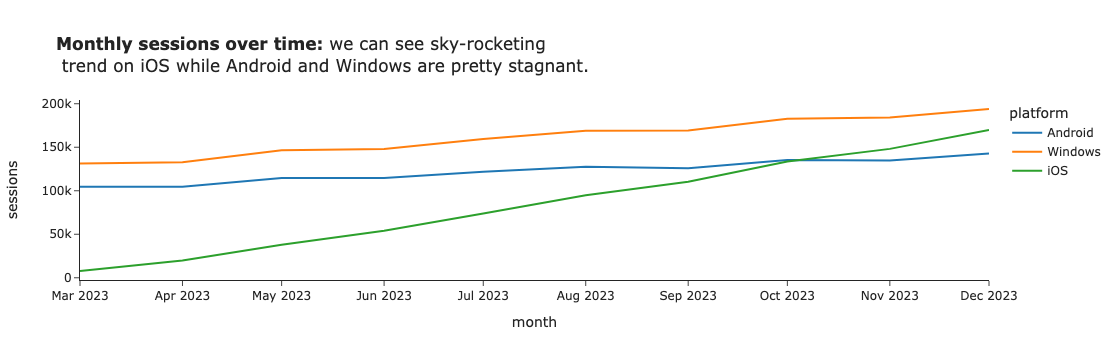

In [188]:
px.line(ts_df, width = 600, labels = {'value': 'sessions', 'os': 'platform', 'month_date': 'month'},
       title = format_string_by_lines(title, 55))

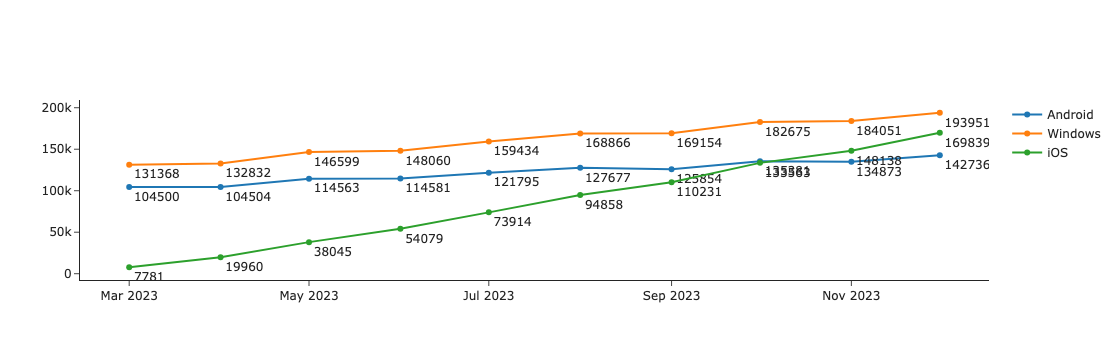

In [122]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        mode='lines+markers+text',
        x=ts_df.index,
        y=ts_df.Android,
        text=ts_df.Android,
        showlegend=True,
        name = 'Android'
    )
)
fig.add_trace(
    go.Scatter(
        mode='lines+markers+text',
        x=ts_df.index,
        y=ts_df.Windows,
        text=ts_df.Windows,
        showlegend=True,
        name = 'Windows'
    )
)
fig.add_trace(
    go.Scatter(
        mode='lines+markers+text',
        x=ts_df.index,
        y=ts_df.iOS,
        text=ts_df.iOS,
        showlegend=True,
        name = 'iOS'
    )
)
fig.update_layout(width = 800)
fig.update_traces(textposition="bottom right")

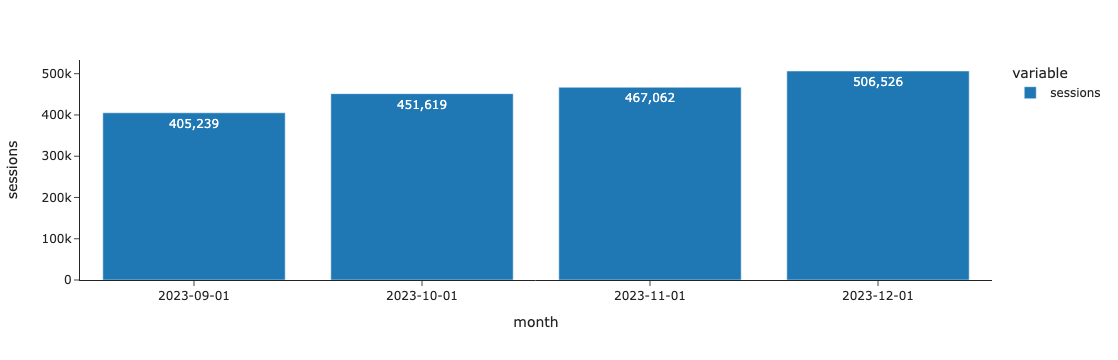

In [123]:
fig = px.bar(pd.DataFrame(ts_df.loc['2023-09-01':].sum(axis = 1)).rename(columns = {0: 'sessions'}), 
       labels = {'value': 'sessions', 'os': 'platform', 'month_date': 'month'}, text_auto = ',.6r',
        width = 600)
fig.update_layout(xaxis_type='category')

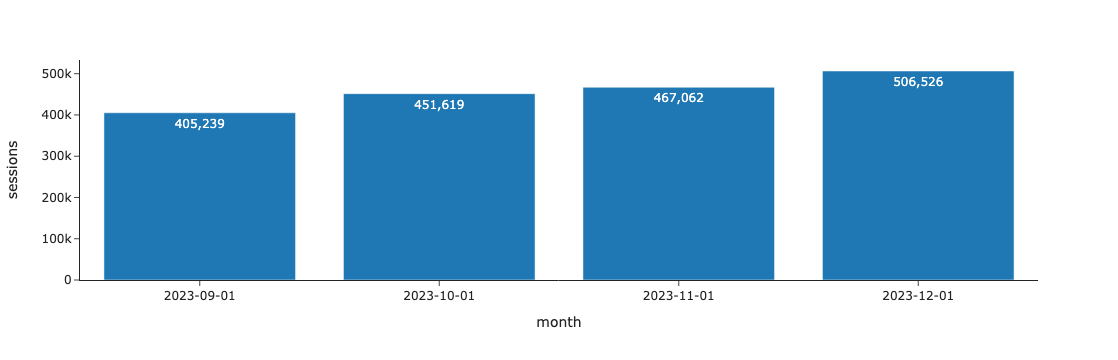

In [124]:
fig = px.bar(ts_df.loc['2023-09-01':].sum(axis = 1), 
       labels = {'value': 'sessions', 'os': 'platform', 'month_date': 'month'}, text_auto = ',.6r',
        width = 600)
fig.update_layout(xaxis_type='category')
fig.update_layout(showlegend = False)

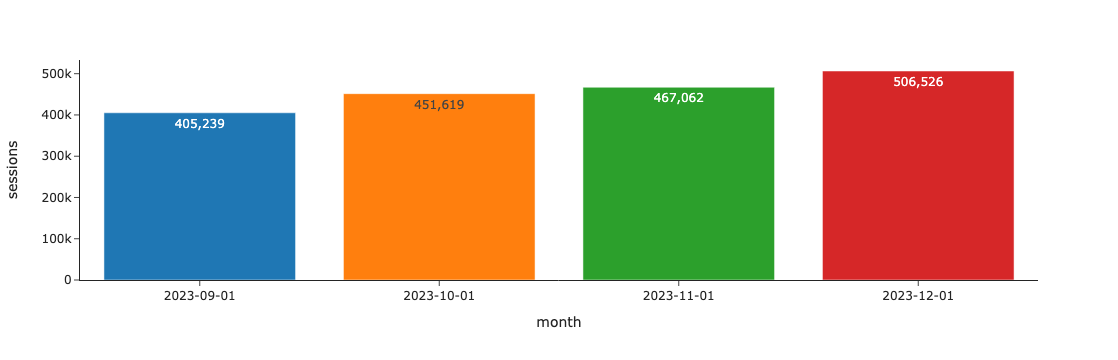

In [125]:
fig = px.bar(ts_df.loc['2023-09-01':].sum(axis = 1), 
       labels = {'value': 'sessions', 'os': 'platform', 'month_date': 'month'}, text_auto = ',.6r',
        width = 600, color = [plotly.colors.diverging.balance[0], plotly.colors.diverging.balance[1], plotly.colors.diverging.balance[2],
                             plotly.colors.diverging.balance[3]])
fig.update_layout(xaxis_type='category')
fig.update_layout(showlegend = False)

In [126]:
import plotly

In [127]:
age_groups = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
regions = ['United Kingdom', 'Germany', 'France', 'Switzerland']

gdp_per_capita = {
    'United Kingdom': 46510.28, 
    'Germany': 51203.55, 
    'France': 43658.98,
    'Switzerland': 91991.60
}

gmv_coef = 1000/gdp_per_capita['United Kingdom']

tmp_data = []

for i in range(len(age_groups)):
    for region in regions: 
        age_group = age_groups[i]
        value = gmv_coef * gdp_per_capita[region] * (1 + 0.1 * i + 0.1*random.random())

        tmp_data.append(
            {
                'age_group': age_group,
                'country': region,
                'gmv': value
            }
        )

gmv_df = pd.DataFrame(tmp_data)

gmv_df = gmv_df.pivot_table(index = 'country', columns = 'age_group', values = 'gmv').loc[
    ['United Kingdom', 'Germany', 'France', 'Switzerland']
]

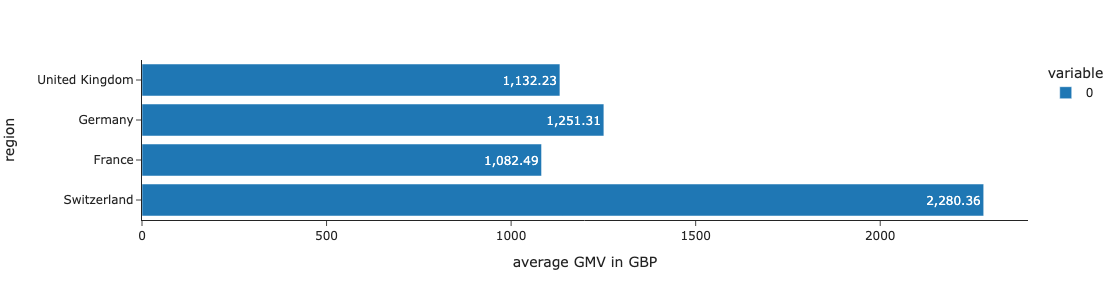

In [128]:
fig = px.bar(gmv_df[['18-24', '25-34', '35-44']].mean(axis = 1).loc[['Switzerland', 'France', 'Germany', 'United Kingdom']],
            text_auto = ',.6r',
       labels = {'country': 'region', 'value': 'average GMV in GBP'}, orientation = 'h', width = 800, height = 300)

# fig.update_layout(showlegend = False)
# fig.update_xaxes(visible = False)

fig

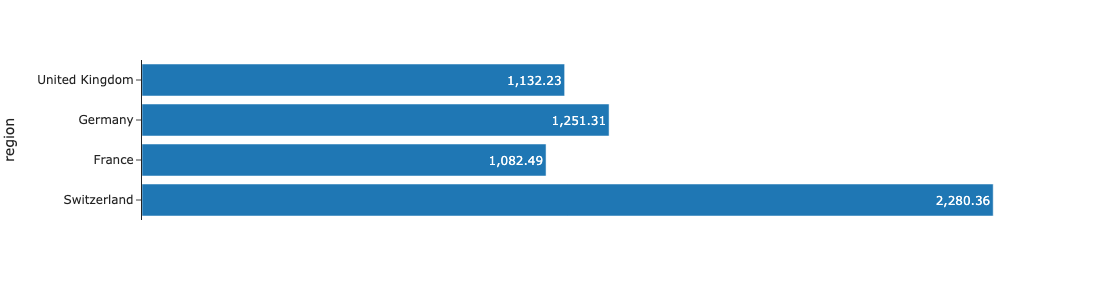

In [129]:
fig = px.bar(gmv_df[['18-24', '25-34', '35-44']].mean(axis = 1).loc[['Switzerland', 'France', 'Germany', 'United Kingdom']],
            text_auto = ',.6r',
       labels = {'country': 'region', 'value': 'average GMV in GBP'}, orientation = 'h', width = 800, height = 300)

fig.update_layout(showlegend = False)
fig.update_xaxes(visible = False)

fig

In [130]:
import numpy as np
conversions = np.random.normal(0.5, 0.1, 6)
conversions

array([0.38296224, 0.41925621, 0.38041972, 0.59988435, 0.47715524,
       0.46141744])

In [131]:
countries = ['United Kingdom', 'Germany', 'France', 'Spain', 'Italy', 'Hungary']
tmp_data = []
for i in range(len(conversions)):
    tmp_data.append({'country': countries[i], 'conversion': conversions[i]})

In [132]:
conv_df = pd.DataFrame(tmp_data)

In [133]:
conv_df['conversion'] = 100*conv_df['conversion']
conv_df = conv_df.set_index('country')

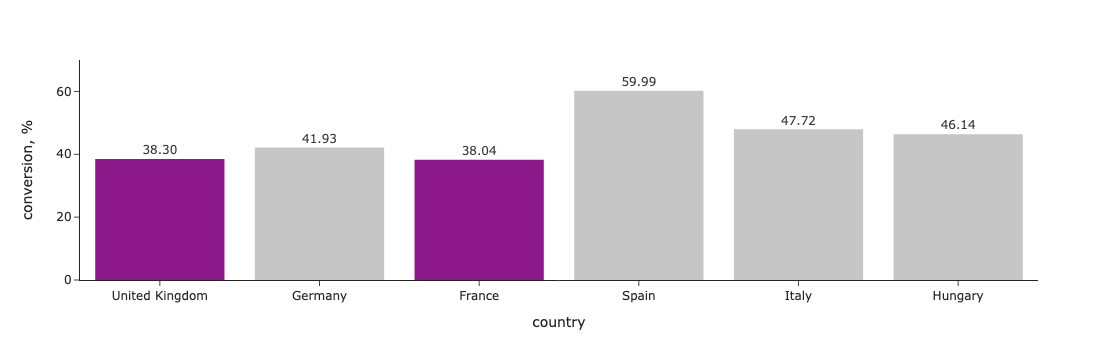

In [134]:
colors = list(map(
    lambda x: 'silver' if x >= 40 else 'purple',
    conv_df.conversion.values
))

fig = px.bar(conv_df, text_auto='.2f', labels = {'value': 'conversion, %'})

fig.update_traces(marker_color=colors, marker_line_color=colors, textposition='outside',
                  marker_line_width=1.5, opacity=0.9)
fig.update_layout(showlegend = False)
fig.update_yaxes(range = [0, 70])

In [135]:
colors

['purple', 'silver', 'purple', 'silver', 'silver', 'silver']

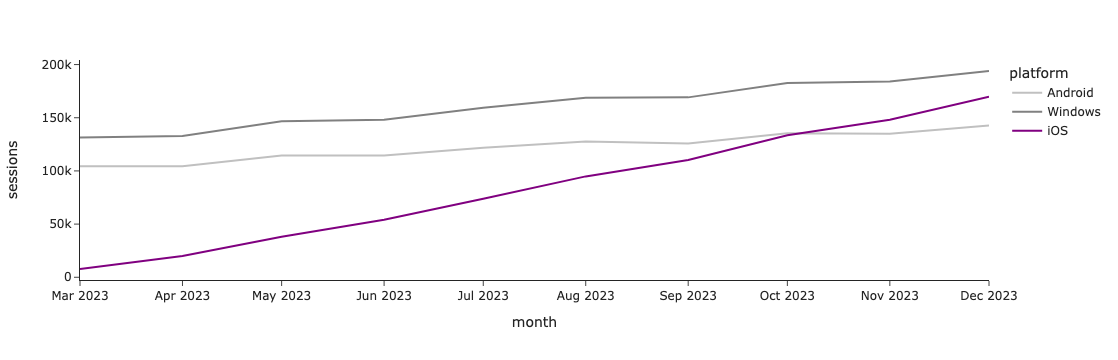

In [136]:
px.line(ts_df, labels = {'value': 'sessions', 'os': 'platform', 'month_date': 'month'},
       color_discrete_map = {'Android': 'silver', 'Windows': 'gray', 'iOS': 'purple'})

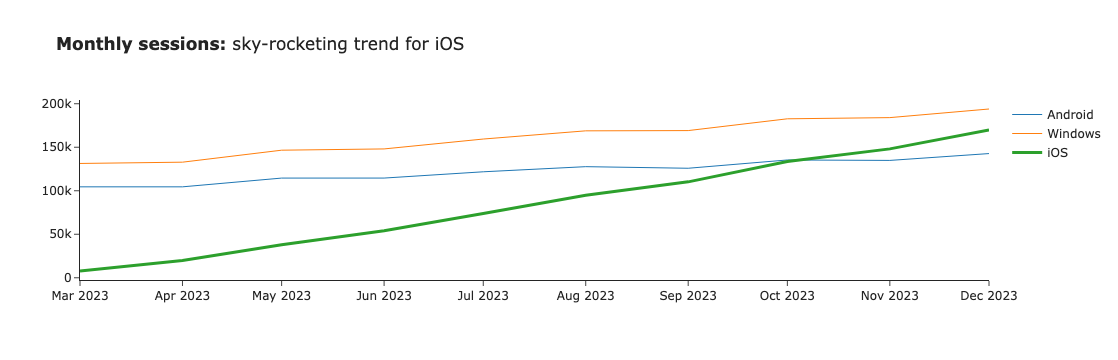

In [173]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        mode='lines',
        x=ts_df.index,
        y=ts_df.Android,
        showlegend=True,
        name = 'Android',
        line = {'width': 1}
    )
)
fig.add_trace(
    go.Scatter(
        mode='lines',
        x=ts_df.index,
        y=ts_df.Windows,
        showlegend=True,
        name = 'Windows',
        line = {'width': 1}
    )
)
fig.add_trace(
    go.Scatter(
        mode='lines',
        x=ts_df.index,
        y=ts_df.iOS,
        showlegend=True,
        name = 'iOS',
        line = {'width': 3}
    )
)
# fig.update_layout(width = 800)
fig.update_traces(textposition="bottom right")
fig.update_layout(title = '<b>Monthly sessions:</b> sky-rocketing trend for iOS')

In [137]:
raw_df = pd.read_csv('full_data.csv', sep = '\t')

In [142]:
cohort_df = raw_df.groupby('user_id')[['date']].min().rename(columns = {'date': 'cohort'}).reset_index()

In [145]:
raw_df = raw_df.merge(cohort_df, how = 'inner')

In [147]:
raw_df.head()

,user_id,date,os,session_id,browser,session_duration,is_fraud,revenue,cohort
0,1000001,2021-01-02,Windows,1,Chrome,941,0,0.0,2021-01-02
1,1000001,2021-01-04,Windows,2,Chrome,72,0,0.0,2021-01-02
2,1000001,2021-01-10,Windows,3,Chrome,386,0,0.0,2021-01-02
3,1000001,2021-01-26,Windows,4,Firefox,612,0,0.0,2021-01-02
4,1000001,2021-03-13,Windows,5,Firefox,637,0,4933.1,2021-01-02


In [148]:
def get_month(d):
    return '-'.join(d.split('-')[:2]) + '-01'

In [151]:
raw_df['month'] = raw_df['date'].map(get_month)

In [152]:
raw_df['cohort_month'] = raw_df['cohort'].map(get_month)

In [163]:
stats_df = raw_df[raw_df.cohort_month >= '2023-02-01'].groupby(['month', 'cohort_month'], as_index = False).session_id.count()

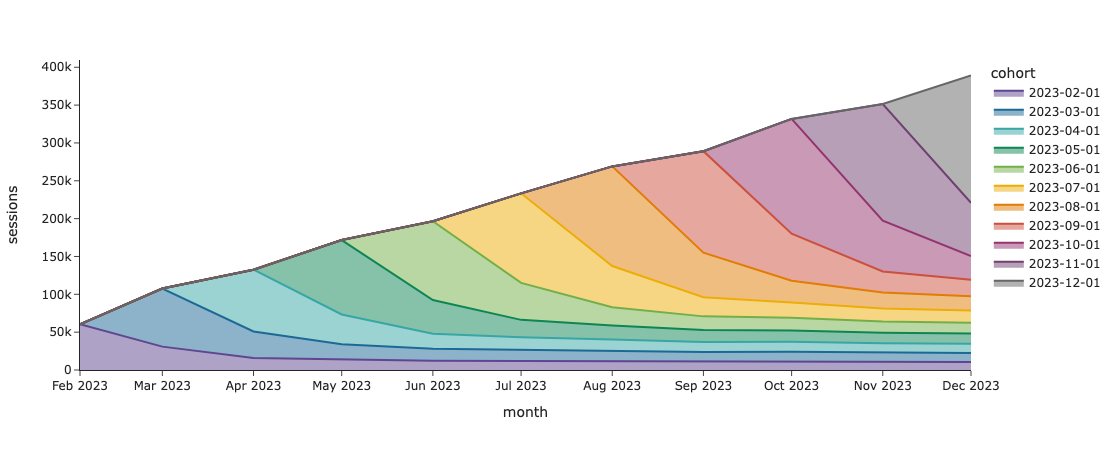

In [167]:
px.area(stats_df.pivot_table(index = 'month', columns = 'cohort_month', values = 'session_id'),
       color_discrete_sequence = px.colors.qualitative.Prism, height = 450, labels = {'value': 'sessions', 'cohort_month': 'cohort'})

In [212]:
tmp_data = []
for rec in ts_df.reset_index().to_dict('records'):
    for platform in ['Android', 'Windows', 'iOS']:
        tmp_data.append(
            {
                'month_date': rec['month_date'],
                'platform': platform,
                'value': int(float(rec[platform]))
            }
        )

In [213]:
raw_ts_df = pd.DataFrame(tmp_data)

In [214]:
raw_ts_df.head()

,month_date,platform,value
0,2023-03-01,Android,104500
1,2023-03-01,Windows,131368
2,2023-03-01,iOS,7781
3,2023-04-01,Android,104504
4,2023-04-01,Windows,132832


In [224]:
raw_ts_df['text_val'] = list(map(
    lambda v, d: '' if d != raw_ts_df.month_date.max() else '%.1fK' % (v/1000),
    raw_ts_df.value,
    raw_ts_df.month_date
))

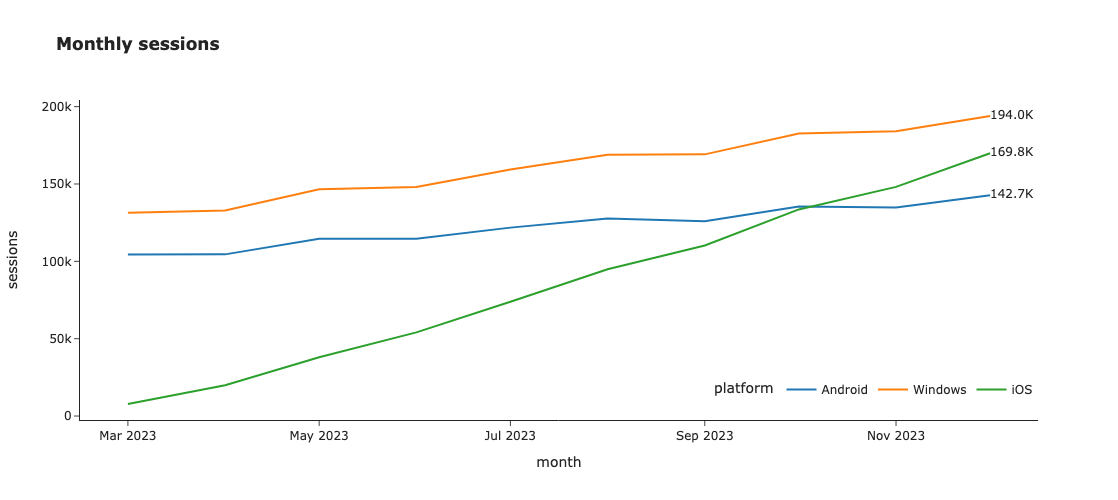

In [246]:
fig = px.line(raw_ts_df, x = 'month_date', y = 'value', color = 'platform', text = 'text_val',
        width = 1000, height = 500, labels = {'value': 'sessions', 'os': 'platform', 'month_date': 'month'},
            title = '<b>Monthly sessions</b>')

fig.update_traces(textposition="middle right", mode='lines+text')
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=0.05, xanchor="right", x=1))

In [248]:
raw_ts_df

,month_date,platform,value,text_val
0,2023-03-01,Android,104500,
1,2023-03-01,Windows,131368,
2,2023-03-01,iOS,7781,
3,2023-04-01,Android,104504,
4,2023-04-01,Windows,132832,
5,2023-04-01,iOS,19960,
6,2023-05-01,Android,114563,
7,2023-05-01,Windows,146599,
8,2023-05-01,iOS,38045,
9,2023-06-01,Android,114581,


In [256]:
# getting the last value for each segment to plot 
annotations = raw_ts_df.groupby('platform', as_index = False).aggregate({'value': 'last', 'month_date': 'last'})\
    .rename(columns = {'value': 'y', 'month_date': 'x'})
annotations['text'] = annotations.y.map(lambda v: '%.1fK' % (v/1000))
annotations = annotations.drop('platform', axis = 1)

In [257]:
annotations

,y,x,text
0,142736,2023-12-01,142.7K
1,193951,2023-12-01,194.0K
2,169839,2023-12-01,169.8K


In [260]:
annotations['showarrow'] = False
annotations['xanchor'] = 'left' 
annotations['yanchor'] = 'middle'
annotations_list = annotations.to_dict('records')

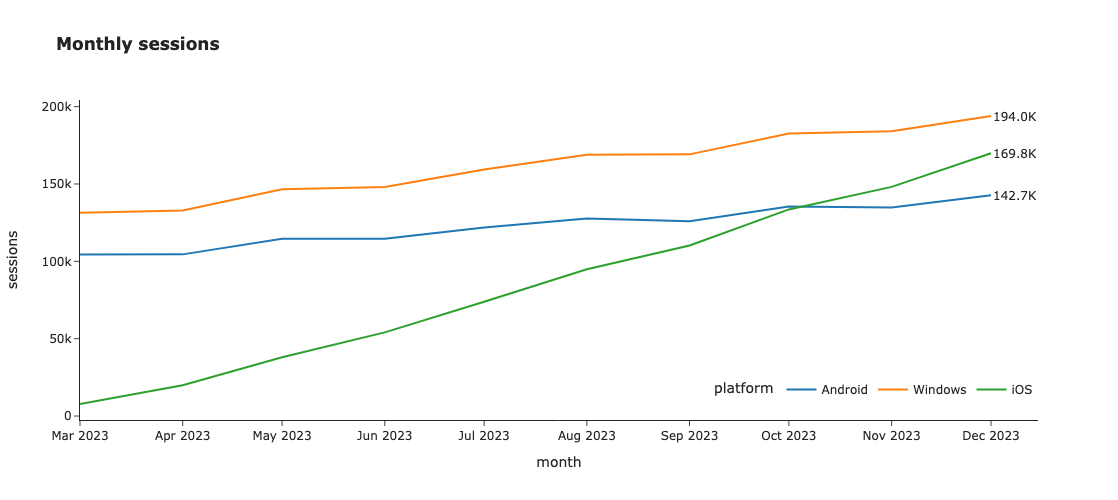

In [261]:
fig = px.line(raw_ts_df, x = 'month_date', y = 'value', color = 'platform',
        width = 1000, height = 500, labels = {'value': 'sessions', 'os': 'platform', 'month_date': 'month'},
        title = '<b>Monthly sessions</b>')

# fig.update_traces(textposition="middle right", mode='lines+text')
fig.update_layout(annotations = annotations_list, legend=dict(orientation="h", yanchor="bottom", y=0.05, xanchor="right", x=1))

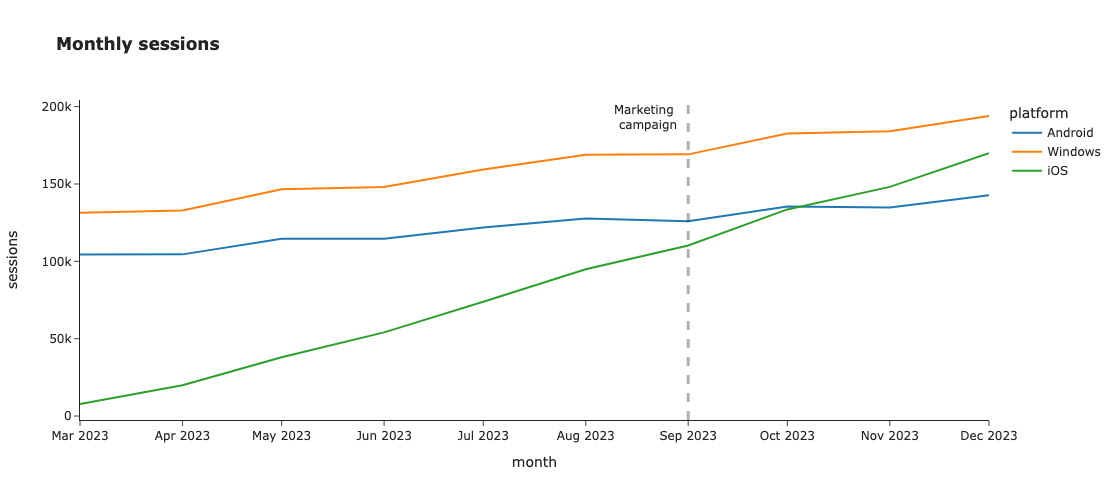

In [278]:
fig = px.line(raw_ts_df, x = 'month_date', y = 'value', color = 'platform',
        width = 1000, height = 500, labels = {'value': 'sessions', 'os': 'platform', 'month_date': 'month'},
        title = '<b>Monthly sessions</b>')

# fig.update_traces(textposition="middle right", mode='lines+text')
# fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=0.05, xanchor="right", x=1))

fig.add_vline(
    x=datetime.datetime.strptime("2023-09-01", "%Y-%m-%d").timestamp() * 1000, line_width=3, line_dash="dash", 
    line_color='black', annotation_text="Marketing   <br> campaign  ", 
    annotation_position="top left")

In [267]:
raw_ts_df.dtypes

month_date    object
platform      object
value          int64
text_val      object
dtype: object